# **Project Name**    - **Hotel Booking Analysis**



##### **Project Type**    - EDA
##### **Contribution**    - Team
##### **Team Member 1 -** Dheeraj Budhlakoti
##### **Team Member 2 -** Saurabh Gaikwad
##### **Team Member 3 -** Bharat Gupta
##### **Team Member 4 -** Utsav Pataihe

# **Project Summary -**

The project involves the analysis of the provided data set pertaining to Hotel bookings for City and Resort Hotels.

# **GitHub Link -**

https://github.com/Dheeraj-Budhlakoti/Hotel-Booking-Analysis--EDA

# **Problem Statement**

> Indented block

> Indented block






**Business Problem overview:**

Study of Hotel bookings related data  is vital for any hospitality business  as it gives insight into booking behaviour of customers as well as channels through which bookings are made.

Customer retention as well as stay longevity is an important objective for any hotel.

An effort has been made in this project to analyse the booking  behaviour of customer for resort and City hotels  through  exploratory data analysis to  identify and understand  the main factors to maximise the bookings.

#### **Define Your Business Objective?**

Answer Here.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [29]:
# Import Libraries
import numpy as np
import pandas as pd

# Importing visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import folium

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
path='/content/drive/MyDrive/Colab Notebooks/Alma Better/Module 1/EDA PROJECT/'
df=pd.read_csv(path+'Hotel Bookings.csv')

### Dataset First View

In [4]:
# Dataset First Look
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
df.shape

(119390, 32)

### Dataset Information



#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

31994

#### Missing Values/Null Values

In [64]:
# Missing Values/Null Values Count
temp_df=df.isnull().sum().reset_index().rename(columns={'index':'Columns',0:'Null Values'})
# Checking Null Value by plotting Bar Graph
px.bar(temp_df,x='Columns',y='Null Values',width= 1000, height= 500,text_auto=True)

From this bar graph we can conclude that we have got 4 null values in 'children' column, 488 null values in 'country' column, 16.34K null values in 'agent' column and lastly 112.593K null values in 'company' column.

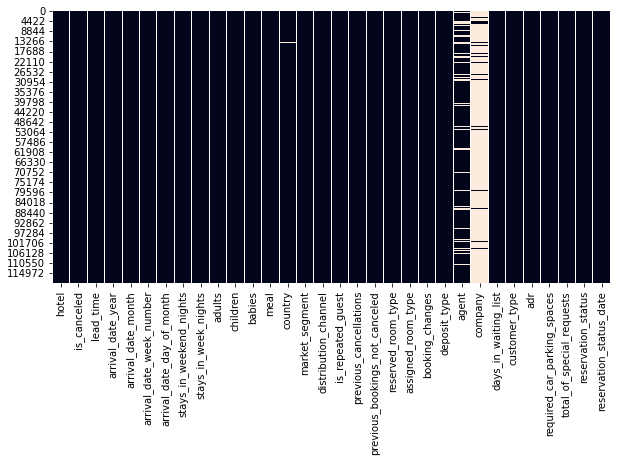

In [8]:
# By using this heatmap we can see the distribution of null values in the dataframe
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(),cbar=False)

In [9]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### What did you know about your dataset?

The dataset given is a dataset from hotel industry, and we have to explore and analyze the data to discover important factors that govern the bookings.

The goal is to analyze the dataset by exploring data provided under various column headings.

The above dataset has 119390 rows and 32 columns. There are no null values in any columns except for 4 columns(children,country,agent,company). The dataset also have 31994 duplicate values

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [11]:
# Dataset Describe
df.describe(include='all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,...,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,...,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,...,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,...,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,...,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


### Variables Description 

* **Hotel:**  H1= Resort Hotel, H2= City Hotel
* **is_canceled** : If the booking was canceled(1) or not(0)
* **lead_time** : Number of days that elapsed between the entering date of the  booking into the PMS(Property Management System) and the arrival date
* **arrival_date_year** : Year of arrival date.
* **arrival_date_month** : Month of arrival date.
* **arrival_date_week_number** : Week number for arrival date.
* **arrival_date_day_of_month**: Which day of the months guest is arriving.
* **stays_in_weekend_nights**: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel.
* **stays_in_week_nights**: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel.
* **adults** : Number of adults.
* **children** : Number of children.
* **babies** : Number of babies.
* **meal**: kind of meal opted for.
* **country** : Country code.
* **market_segment**: Through which channel hotels were booked.
* **distribution_channel** : How the customer accessed the stay- Corporate Booking/Direct/TA.TO
* **is_repeated_guest** : The values indicating if the booking name was from a repeated guest (1) or not (0).
* **previous_cancellations** : Was there a cancellation before.
* **previous_bookings_not_canceled** : Count of previous bookings not cancelled.
* **reserved_room_type** : Code of room type reserved.
* **assigned_room_type** : Code for the type of room assigned to the booking.
* **booking_changes** : Count of changes made to booking.
* **deposit_type** : Deposit type.
* **agent** : If the booking happens through agents or not.
* **company** : If the booking happens through companies, the company ID that made the booking or responsible for paying the booking.
* **days_in_waiting_list** : Number of days the booking was on the waiting list before the confirmation to the customer.
* **customer_type** : Booking type like Transient – Transient-Party – Contract – Group.
* **adr** : Average Daily Rates that described via way of means of dividing the sum of all accommodations transactions using entire numbers of staying nights.
* **required_car_parking_spaces** : How many parking areas are necessary for the customers.
* **total_of_special_requests** : Total unique requests from consumers.
* **reservation_status**: The last status of reservation, assuming one of three categories: Canceled – booking was cancelled by the customer; Check-Out;No-Show.
* **reservation_status_date**: The last status date.

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
for item in list(df.columns):
  print(f"Column name: {item} - No. of unique values: {df[item].nunique()}")

Column name: hotel - No. of unique values: 2
Column name: is_canceled - No. of unique values: 2
Column name: lead_time - No. of unique values: 479
Column name: arrival_date_year - No. of unique values: 3
Column name: arrival_date_month - No. of unique values: 12
Column name: arrival_date_week_number - No. of unique values: 53
Column name: arrival_date_day_of_month - No. of unique values: 31
Column name: stays_in_weekend_nights - No. of unique values: 17
Column name: stays_in_week_nights - No. of unique values: 35
Column name: adults - No. of unique values: 14
Column name: children - No. of unique values: 5
Column name: babies - No. of unique values: 5
Column name: meal - No. of unique values: 5
Column name: country - No. of unique values: 177
Column name: market_segment - No. of unique values: 8
Column name: distribution_channel - No. of unique values: 5
Column name: is_repeated_guest - No. of unique values: 2
Column name: previous_cancellations - No. of unique values: 15
Column name: 

## 3. ***Data Wrangling***

### Data Wrangling Code

In [13]:
# Firstly lets make a copy of our df to work on
copy_df=df.copy()

In [14]:
copy_df.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01


In [15]:
# The first thing we need to do to make our data clean is delete duplicate values from the dataset
copy_df.drop_duplicates(inplace=True)
copy_df.shape

(87396, 32)

In [16]:
# Now checking percenatge of null values for each column
100*(copy_df.isna().sum()/copy_df.shape[0]).sort_values(ascending=False)

company                           93.982562
agent                             13.951439
country                            0.517186
children                           0.004577
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                       0.000000
hotel                              0.000000
previous_cancellations             0.000000
days_in_waiting_list               0.000000
customer_type                      0.000000
adr                                0.000000
required_car_parking_spaces        0.000000
total_of_special_requests          0.000000
reservation_status                 0.000000
previous_bookings_not_canceled     0.000000
is_repeated_guest                  0.000000
is_canceled                        0.000000
distribution_channel               0.000000
market_segment                     0.000000
meal                               0.000000
babies                          

In [17]:
# Here we can see that the company column has approx 94% missing data, which is very high so we should drop that column
copy_df.drop(columns=['company'],inplace=True)

In [18]:
# Now for other columns they have less % of null values, so we can just replace them.
copy_df.agent.fillna(0,inplace=True)
copy_df.country.fillna('Others',inplace=True)
copy_df.children.fillna(0,inplace=True)

In [19]:
# Now again checking for Missing Values/Null Values Count
temp_df=copy_df.isnull().sum().reset_index().rename(columns={'index':'Columns',0:'Null Values'})
px.bar(temp_df,x='Columns',y='Null Values',width= 1000, height= 500,text_auto=True)

In [20]:
copy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87396 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                           

In [22]:
# In the above info we can see the datatypes of all columns are correct except for children and agent.
# So to make further operations easy we should change their datatypes to suitable types.
copy_df['children']=copy_df['children'].astype(int)
copy_df['agent']=copy_df['agent'].astype(int)

In [23]:
copy_df[['children','agent']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   children  87396 non-null  int64
 1   agent     87396 non-null  int64
dtypes: int64(2)
memory usage: 2.0 MB


In [24]:
# Now babies, adults, and childrens can't be zero at the same time, so we can drop all the observations having zero at the same time.
copy_df=copy_df[~((copy_df['adults']==0) & (copy_df['children']==0) & (copy_df['babies']==0))]

In [25]:
copy_df.shape

(87230, 31)

In [26]:
# Adding new columns for analysis
copy_df['total_stay_nights']=copy_df['stays_in_week_nights']+copy_df['stays_in_weekend_nights']
copy_df[['stays_in_week_nights','stays_in_weekend_nights','total_stay_nights']]

,stays_in_week_nights,stays_in_weekend_nights,total_stay_nights
0,0,0,0
1,0,0,0
2,1,0,1
3,1,0,1
4,2,0,2
...,...,...,...
119385,5,2,7
119386,5,2,7
119387,5,2,7
119388,5,2,7


In [27]:
# Creating seperate datasets for resort and city hotel
resort_df=copy_df[copy_df['hotel']=='Resort Hotel']
city_df=copy_df[copy_df['hotel']=='City Hotel']

### What all manipulations have you done and insights you found?

Answer here

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 From which country most guests come

In [35]:
guest_country = copy_df[copy_df['is_canceled'] == 0]['country'].value_counts().reset_index()
guest_country.columns = ['Country', 'No of guests']
guest_country

,Country,No of guests
0,PRT,17573
1,GBR,8440
2,FRA,7091
3,ESP,5382
4,DEU,4332
...,...,...
161,ZMB,1
162,SYC,1
163,MDG,1
164,SMR,1


In [37]:
# Chart - 1 visualization code----------------s1
basemap = folium.Map()
ax = px.choropleth(guest_country, locations = guest_country['Country'],
                           color = guest_country['No of guests'], hover_name = guest_country['Country'])
ax.show()

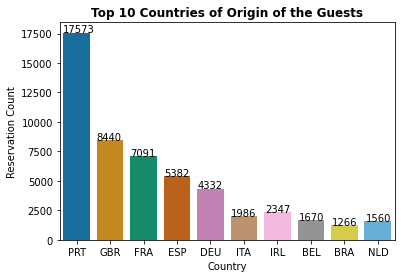

In [34]:
x=df.country.value_counts()
z=sns.countplot(x=copy_df[copy_df['is_canceled'] == 0]['country'], data=copy_df,order=pd.value_counts(df['country']).iloc[:10].index,palette= 'colorblind')
plt.title('Top 10 Countries of Origin of the Guests', weight='bold')
plt.xlabel('Country')
plt.ylabel('Reservation Count')
for p in z.patches:
    z.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3 which is the busiest month

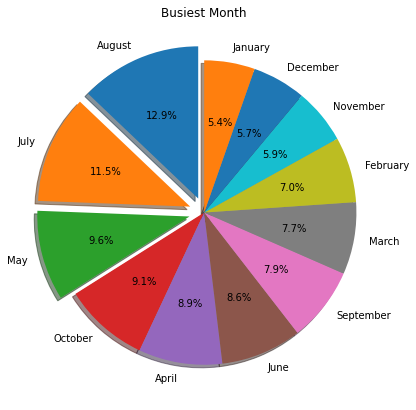

In [55]:
# Chart - 3 visualization code-------------s4
activities = ['August','July','May','October','April','June','September','March','February',"November",'December','January']
plt.figure(figsize=(14,7))
plt.pie(copy_df.arrival_date_month.value_counts(),
labels =activities,
startangle = 90,
shadow = True,
explode =(0.1,0.1,0.1,0,0,0,0,0,0,0,0,0),
autopct ='%1.1f%%')
plt.title('Busiest Month')

# Print the chart
plt.show()

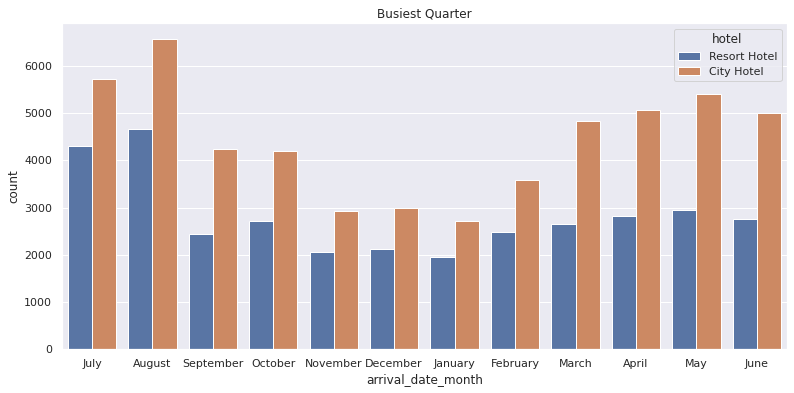

In [59]:
sns.set(rc={'figure.figsize':(13,6)});
sns.countplot(copy_df.arrival_date_month,data=df,hue=df.hotel);
plt.title('Busiest Quarter');

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4 Total nights spent by guests by market segment and hotel type

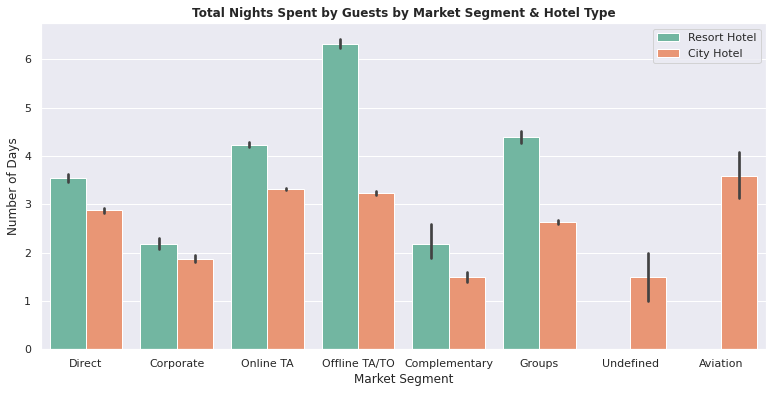

In [60]:
# Chart - 4 visualization code-------------s5
sns.barplot(x = "market_segment", y = "total_stay_nights", data = copy_df, hue = "hotel", palette = 'Set2')
plt.title('Total Nights Spent by Guests by Market Segment & Hotel Type', weight='bold')
plt.xlabel('Market Segment')
plt.ylabel('Number of Days')
plt.legend(loc = "upper right")

#### Chart -  assigned room type

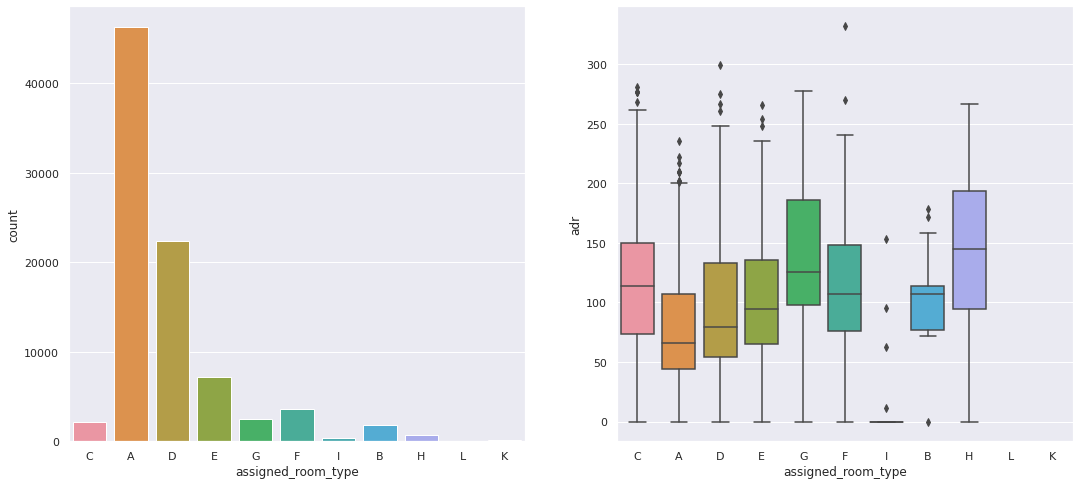

In [77]:
# Chart - 2 visualization code------------ s3
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

grp_by_room = copy_df.groupby('assigned_room_type')
copy_df['Num_of_bookings'] = grp_by_room.size()

sns.countplot(ax = axes[0], x = copy_df['assigned_room_type'])
sns.boxplot(ax = axes[1], x = copy_df['assigned_room_type'], y = df['adr'][:5000])
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

In [ ]:
# Checking for how long people stay in Resort hotels
resort_df['total_stay_nights'].value_counts()

1     6899
7     5675
2     4921
3     4285
4     3955
5     2561
6     1625
10     884
14     771
8      700
9      581
0      360
11     291
12     138
13      93
21      45
15      32
28      31
16      18
18      18
17      12
25      12
19      10
22       6
35       5
30       5
42       4
26       3
23       3
29       3
56       2
60       1
45       1
69       1
46       1
27       1
33       1
20       1
38       1
Name: total_stay_nights, dtype: int64

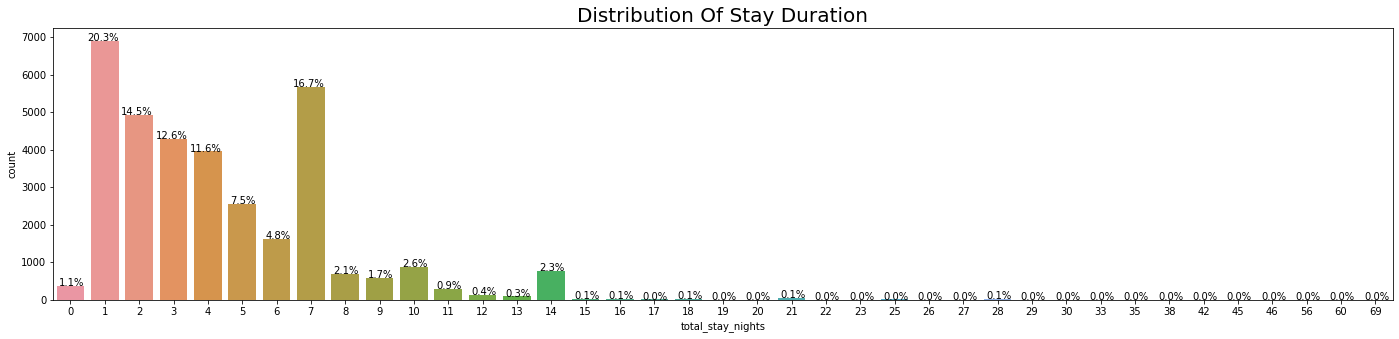

In [ ]:
# Plotting graph to visualize and also show percentage distribution 
plt.figure(figsize=(24,5))
total = float(len(resort_df))
ax = sns.countplot(x='total_stay_nights', data=resort_df)
plt.title('Distribution Of Stay Duration', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

In [ ]:
# Checking for how long people stay in City hotels
city_df['total_stay_nights'].value_counts()

3     13542
2     10813
1     10270
4      9610
5      4168
7      1845
6      1638
8       362
0       231
9       198
10      188
14       88
11       76
12       58
13       40
15       37
16       15
20       13
19       12
29       10
21       10
17        8
30        8
22        6
24        6
18        6
27        3
26        3
28        3
23        2
25        2
48        1
33        1
34        1
Name: total_stay_nights, dtype: int64

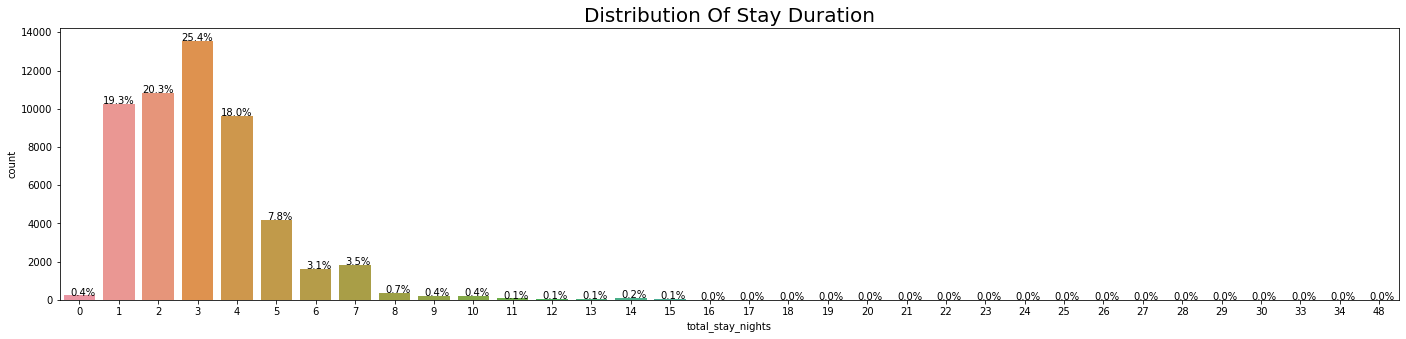

In [ ]:
# Plotting graph to visualize and also show percentage distribution 
plt.figure(figsize=(24,5))
total = float(len(city_df))
ax = sns.countplot(x='total_stay_nights', data=city_df)
plt.title('Distribution Of Stay Duration', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5 distribution of segment by deposit type

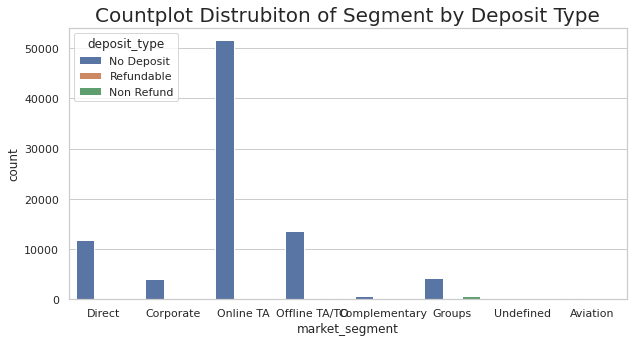

In [79]:
# Chart - 5 visualization code---------s7
plt.figure(figsize = (10,5))
sns.set(style = "whitegrid")
plt.title("Countplot Distrubiton of Segment by Deposit Type", fontdict = {'fontsize':20})
ax = sns.countplot(x = "market_segment", hue = 'deposit_type', data = copy_df)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

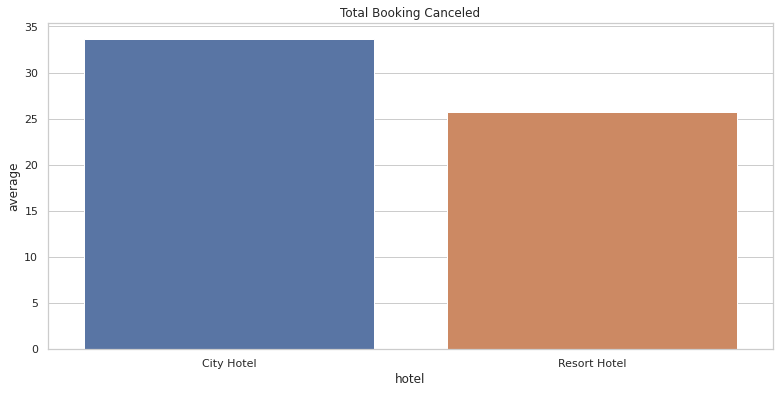

In [80]:
# Chart - 6 visualization code---s9
copy_df["Canceled_bookings"]=copy_df.is_canceled+copy_df.previous_cancellations
booking_canc=copy_df.groupby('hotel')['Canceled_bookings'].describe()
sns.barplot(booking_canc.index,booking_canc['mean']*100);
plt.title('Total Booking Canceled');
plt.ylabel('average');

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

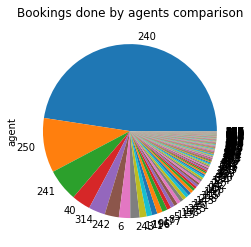

In [ ]:
resort_df.loc[resort_df['agent']!=0,'agent'].value_counts().plot(kind='pie',title='Bookings done by agents comparison')

####What is the percentage of bookings for each year?

In [38]:
# Checking total bookings for each year
copy_df['arrival_date_year'].value_counts().sort_index()

2015    13284
2016    42313
2017    31633
Name: arrival_date_year, dtype: int64

In [39]:
# Checking total bookings for each year for both hotel types
copy_df[['arrival_date_year','hotel']].value_counts().unstack()

hotel,City Hotel,Resort Hotel
arrival_date_year,,
2015,6526,6758
2016,26684,15629
2017,20064,11569


In [40]:
# Function to show percentage in countplot
def barPerc(df,xVar,ax):
    '''
    barPerc(): Add percentage for hues to bar plots
    args:
        df: pandas dataframe
        xVar: (string) X variable 
        ax: Axes object (for Seaborn Countplot/Bar plot or
                         pandas bar plot)
    '''
    # 1. how many X categories
    ##   check for NaN and remove
    numX=len([x for x in df[xVar].unique() if x==x])

    # 2. The bars are created in hue order, organize them
    bars = ax.patches
    ## 2a. For each X variable
    for ind in range(numX):
        ## 2b. Get every hue bar
        ##     ex. 8 X categories, 4 hues =>
        ##    [0, 8, 16, 24] are hue bars for 1st X category
        hueBars=bars[ind:][::numX]
        ## 2c. Get the total height (for percentages)
        total = sum([x.get_height() for x in hueBars])

        # 3. Print the percentage on the bars
        for bar in hueBars:
            ax.text(bar.get_x() + bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center",va="bottom")

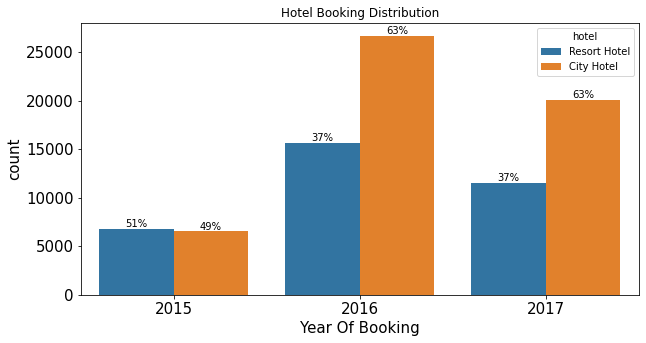

In [41]:
# Plotting count plot to show distribution of booking among Resort Hotels and City Hotels for all three years
plt.figure(figsize=(10,5))
ax=sns.countplot (x= 'arrival_date_year', data= copy_df, hue= 'hotel')
plt.xticks(size=15)
plt.xlabel('Year Of Booking',size=15)
plt.yticks(size=15)
plt.ylabel('count',size=15)
plt.title("Hotel Booking Distribution")
barPerc(copy_df,"arrival_date_year",ax)

##### 1. Why did you pick the specific chart?

The chart we have picked here is countplot from seaborn library, as it is a very effct method to show the counts of observations in each categorical bin using bars. And on top of bars we have also added percentage to show booking percentage for resort hotel and city hotels.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

####How long people stay in hotel Percentage wise comparison of city and resort hotel?

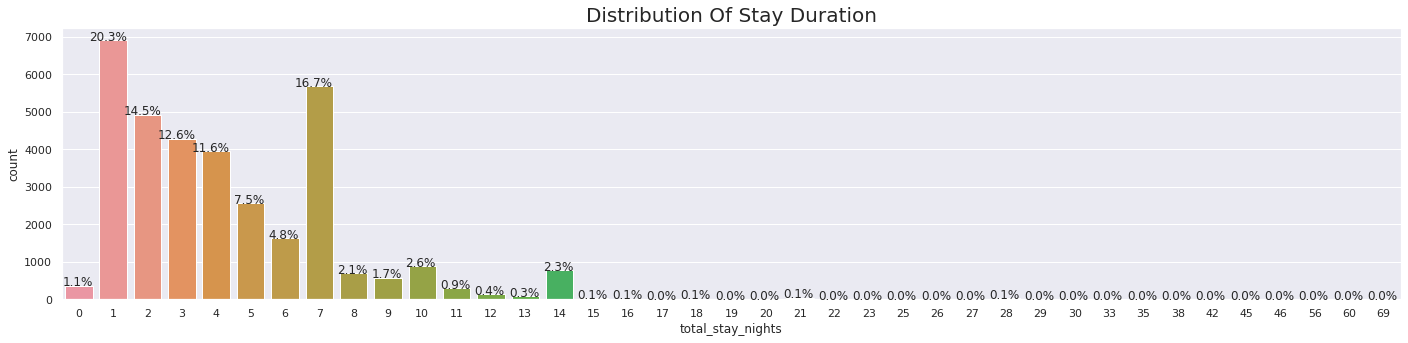

In [65]:
# Plotting graph to visualize how long people stay in Resort hotels and also show percentage distribution 
plt.figure(figsize=(24,5))
total = float(len(resort_df))
ax = sns.countplot(x='total_stay_nights', data=resort_df)
plt.title('Distribution Of Stay Duration', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

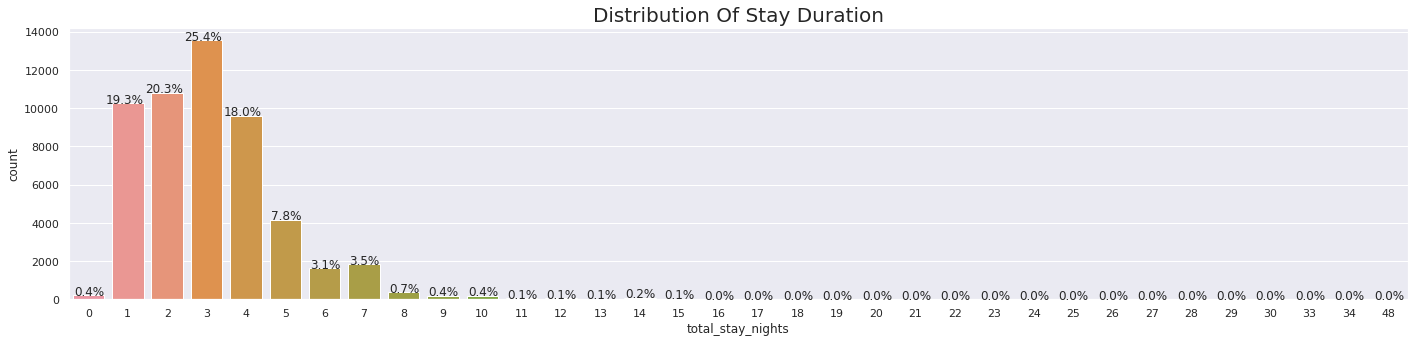

In [66]:
# Plotting graph to visualize how long people stay in City hotels and also show percentage distribution 
plt.figure(figsize=(24,5))
total = float(len(city_df))
ax = sns.countplot(x='total_stay_nights', data=city_df)
plt.title('Distribution Of Stay Duration', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

##### 1. Why did you pick the specific chart?

The chart we have picked here is again countplot from seaborn library, as it is a very effct method to show the counts of observations in each categorical bin using bars. And on top of bars we have also added percentage for better comparison.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

####Which meal type is most preferred meal of customer

In [83]:
# Checking value counts for different meal types
ax=copy_df['meal'].value_counts()
ax

BB           67907
SC            9391
HB            9080
Undefined      492
FB             360
Name: meal, dtype: int64

Text(0.5, 1.0, 'Meal Types')

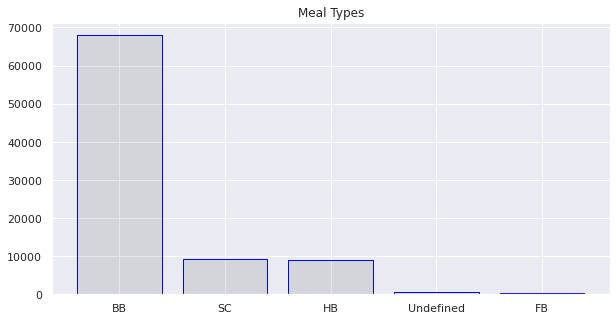

In [69]:
# Visualizing different meal types
plt.figure(figsize=(10,5))
plt.bar(ax.index, ax.values, color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue')
plt.title("Meal Types")

In [ ]:
ax=copy_df[['meal','hotel']].value_counts().unstack()
ax

hotel,City Hotel,Resort Hotel
meal,,
BB,41160.0,26747.0
FB,11.0,349.0
HB,2786.0,6294.0
SC,9317.0,74.0
Undefined,NaN,492.0


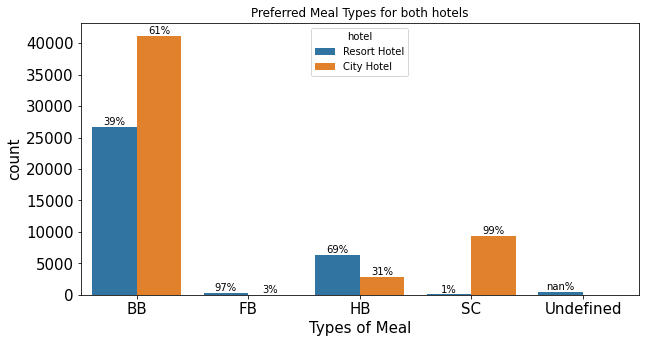

In [ ]:
# Comparing preferred meal types for both hotels
plt.figure(figsize=(10,5))
ax=sns.countplot (x= 'meal', data= copy_df, hue= 'hotel')
plt.xticks(size=15)
plt.xlabel('Types of Meal',size=15)
plt.yticks(size=15)
plt.ylabel('count',size=15)
plt.title("Preferred Meal Types for both hotels")
barPerc(copy_df,'meal',ax)

##### 1. Why did you pick the specific chart?

Here in the first graph we have used a barplot which is best to show the relationship between a numeric and a categoric variable. And the second graph we have used is countplot to show comparison in preferred meal types between both type of hotels

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Which agent makes the most number of bookings?

<Figure size 1440x360 with 0 Axes>

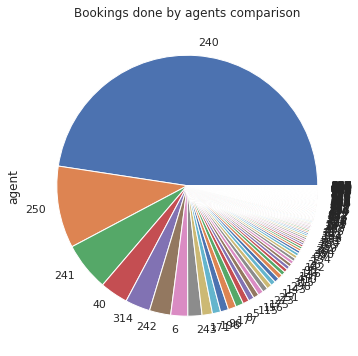

<Figure size 1440x360 with 0 Axes>

In [76]:
# Visualizing comparison in bookings done by different agent
resort_df.loc[resort_df['agent']!=0,'agent'].value_counts().plot(kind='pie',title='Bookings done by agents comparison')
plt.figure(figsize = (20,5))

##### 1. Why did you pick the specific chart?

The chart we used is called pie chart. A Pie Chart is a circle divided into sectors that each represent a proportion of the whole. So as to best visualize which agent covers how much proportion of booking we used pie chart.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Monthly customers and cancellation.

In [ ]:
# Checking monthly customer bookings and cancelations
copy_df[['arrival_date_month','is_canceled']].value_counts().unstack()

is_canceled,0,1
arrival_date_month,,
April,5494,2406
August,7620,3622
December,3735,1377
February,4671,1412
January,3648,1037
July,6847,3196
June,5403,2353
March,5660,1829
May,5902,2442


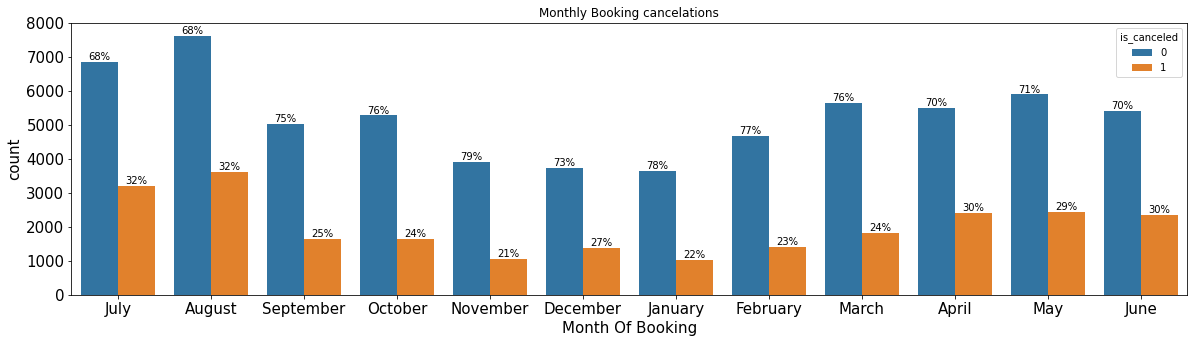

In [ ]:
# Visualizing how many bookings got canceled for each month
plt.figure(figsize=(20,5))
ax=sns.countplot (x= 'arrival_date_month', data= copy_df, hue= 'is_canceled')
plt.xticks(size=15)
plt.xlabel('Month Of Booking',size=15)
plt.yticks(size=15)
plt.ylabel('count',size=15)
plt.title("Monthly Booking cancelations")
barPerc(copy_df,'arrival_date_month',ax)

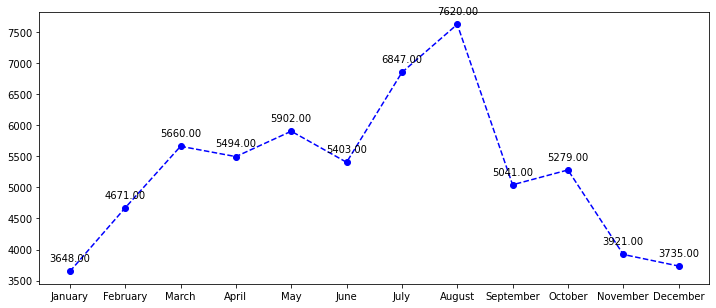

In [ ]:
# Visualizing monthly bookings that were not canceled
plt.figure(figsize=(12,5))
sort_order=['January','February','March','April','May','June','July','August','September','October','November','December']
ax=copy_df[copy_df['is_canceled']==0]['arrival_date_month'].value_counts().reindex(sort_order)
plt.plot(ax,'bo',linestyle='dashed')
for x,y in zip(ax.index,ax.values):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.show()

##### 1. Why did you pick the specific chart?

We have used two charts here, first one is a countplot and secondly linechart. We have used countplot from seaborn lib. so as to visualize comparison in canceled and not canceled bookings for each month. And secondly we have used linechart to visualize trend in monthly bookings(not canceled).

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Repeated guest relation with cancelation

In [ ]:
# Checking number of cancellations 0 - not canceled , 1 -canceled
copy_df['is_canceled'].value_counts()

0    63221
1    24009
Name: is_canceled, dtype: int64

In [ ]:
# Checking relation between cancellation and repeated guests
copy_df[['is_canceled','is_repeated_guest']].value_counts().unstack()

is_repeated_guest,0,1
is_canceled,,
0,60117,3104
1,23749,260


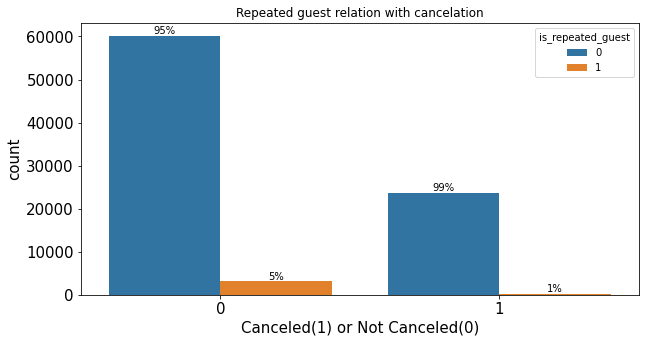

In [ ]:
# Visualizing relation between cancellation and repeated guests
plt.figure(figsize=(10,5))
ax=sns.countplot (x= 'is_canceled', data= copy_df, hue= 'is_repeated_guest')
plt.xticks(size=15)
plt.xlabel('Canceled(1) or Not Canceled(0)',size=15)
plt.yticks(size=15)
plt.ylabel('count',size=15)
plt.title("Repeated guest relation with cancelation")
barPerc(copy_df,'is_canceled',ax)

##### 1. Why did you pick the specific chart?

Here again we have used countplot from seaborn library to best visualize comparison in repeated and non repeated guests for canceled and not canceled bookings.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Relationship of lead time with cancelation.

In [ ]:
copy_df.groupby('is_canceled')['lead_time'].mean()

is_canceled
0     70.185555
1    105.738306
Name: lead_time, dtype: float64

In [ ]:
copy_df.groupby('is_canceled')['lead_time'].mean()

is_canceled
0     70.185555
1    105.738306
Name: lead_time, dtype: float64

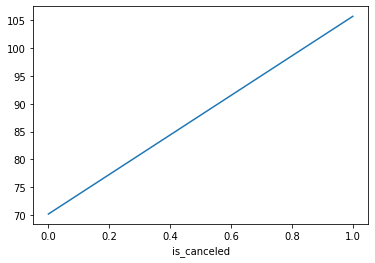

In [ ]:
copy_df.groupby('is_canceled')['lead_time'].mean().plot()

##### 1. Why did you pick the specific chart?

Here, we have used a simple linechart to best visualize the effect of lead time on the bookings getting canceled or not.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

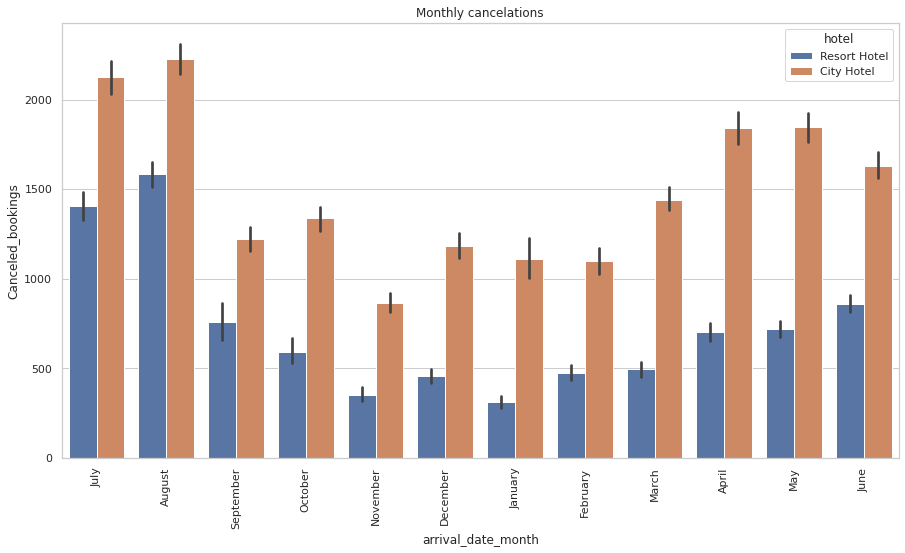

In [ ]:
# Chart - 7 visualization code-------------s10
#df_copy=df[df.Canceled_bookings!=0]
copy_df['Canceled_bookings']=df.is_canceled+df.previous_cancellations
month_sorted = ['January','February','March','April','May','June','July','August','September','October','November','December']
plt.title("Monthly cancelations")
sns.barplot(x= 'arrival_date_month', y= 'Canceled_bookings', hue= df['hotel'], estimator= sum, data= copy_df)
plt.xticks(rotation = 90)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

Text(0, 0.5, 'Reservation Count')

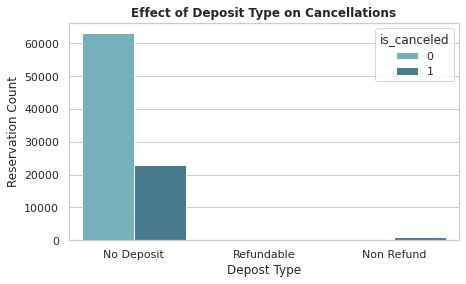

In [81]:
# Chart - 8 visualization code---------s16
copy_df.groupby('deposit_type')['is_canceled'].value_counts(normalize = True)
plt.figure(figsize=(7,4))
sns.countplot(x= 'deposit_type',hue = 'is_canceled',data = copy_df,palette= 'GnBu_d')
plt.title('Effect of Deposit Type on Cancellations',weight = 'bold')
plt.xlabel('Depost Type')
plt.ylabel('Reservation Count')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

What are the effects of market segment on cancellations

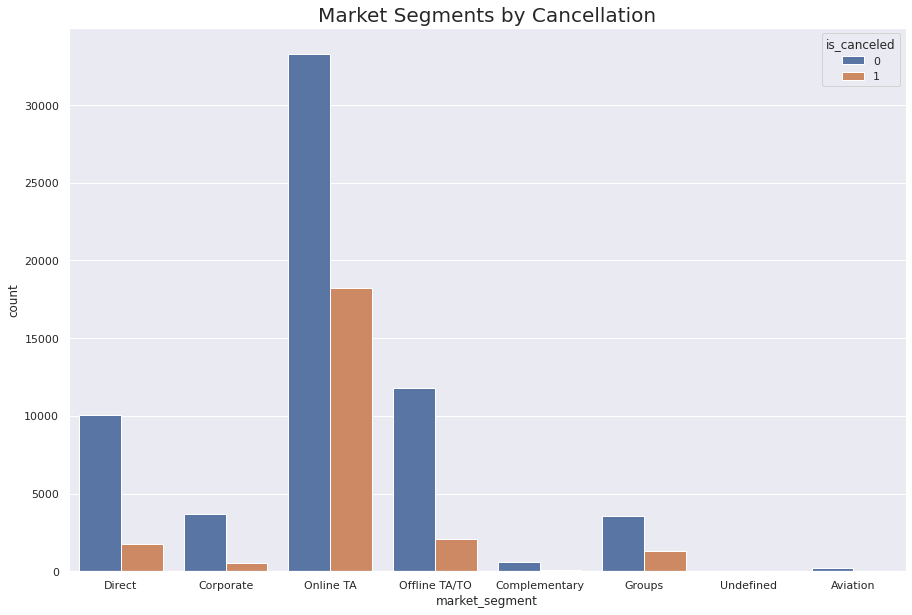

In [82]:
# Chart - 9 visualization code----------s8

plt.figure(figsize = (15,10))
sns.set(style = "darkgrid")
plt.title("Market Segments by Cancellation", fontdict = {'fontsize':20})
ax = sns.countplot(x = "market_segment", hue = 'is_canceled', data = copy_df)

**dheeraj bro aap questions line se set kr lena or dataframe ke name bhi set kr lena ab bahot nind ari hai kuch na samjhe toh morning me call kr lena**


**U1) Which is the most common channel for booking hotels?**

In [ ]:
group_by_dc = df_hotel_booking.groupby('distribution_channel')
d1 = pd.DataFrame(round((group_by_dc.size()/df_hotel_booking.shape[0])*100,2)).reset_index().rename(columns = {0: 'Booking_%'})
plt.figure(figsize = (8,8))
data = d1['Booking_%']
labels = d1['distribution_channel']
plt.pie(x=data, autopct="%.2f%%", explode=[0.05]*5, labels=labels, pctdistance=0.5)
plt.title("Booking % by distribution channels", fontsize=14);

**U4) which hotel seems to make more revenue?**

In [ ]:
grouped_by_hotel = df_hotel_booking.groupby('hotel')
d3 = grouped_by_hotel['adr'].agg(np.mean).reset_index().rename(columns = {'adr':'avg_adr'})   # calculating average adr
plt.figure(figsize = (8,5))
sns.barplot(x = d3['hotel'], y = d3['avg_adr'] )
plt.show()

**U2) Which channel is mostly used for early booking of hotels?**

In [ ]:
group_by_dc = df_hotel_booking.groupby('distribution_channel')
d2 = pd.DataFrame(round(group_by_dc['lead_time'].median(),2)).reset_index().rename(columns = {'lead_time': 'median_lead_time'})
plt.figure(figsize = (7,5))
sns.barplot(x = d2['distribution_channel'], y = d2['median_lead_time'])
plt.show()

**U3) Which channel has longer average waiting time?**

In [ ]:
d4 = pd.DataFrame(round((group_by_dc['days_in_waiting_list']).mean(),2)).reset_index().rename(columns = {'days_in_waiting_list': 'avg_waiting_time'})
plt.figure(figsize = (7,5))
sns.barplot(x = d4['distribution_channel'], y = d4['avg_waiting_time'])
plt.show()

While booking via TA/TO one may have to wait a little longer to confirm booking of rooms.

**U7 & U8**

In [ ]:
def check_room_allot(x):
  if x['reserved_room_type'] != x['assigned_room_type']:
    return 1
  else:
    return 0
df_hotel_booking['same_room_not_alloted'] = df_hotel_booking.apply(lambda x : check_room_allot(x), axis = 1)

In [ ]:
plt.figure(figsize = (12,6))
sns.boxplot(x = 'same_room_not_alloted', y = 'adr', data = df_hotel_booking)
plt.show()

**U5) Which hotel has higher bookings cancellation rate.**

In [ ]:
# Selecting and counting number of cancelled bookings for each hotel.
cancelled_data = df_hotel_booking[df_hotel_booking['is_canceled'] == 1]
cancel_grp = cancelled_data.groupby('hotel')
D1 = pd.DataFrame(cancel_grp.size()).rename(columns = {0:'total_cancelled_bookings'})

# Counting total number of bookings for each type of hotel
grouped_by_hotel = df_hotel_booking.groupby('hotel')
total_booking = grouped_by_hotel.size()
D2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
D3 = pd.concat([D1,D2], axis = 1)

# Calculating cancel percentage 
D3['cancel_%'] = round((D3['total_cancelled_bookings']/D3['total_bookings'])*100,2)
D3

In [ ]:
plt.figure(figsize = (10,5))
sns.barplot(x = D3.index, y = D3['cancel_%'])
plt.show()

Almost 30 % of City Hotel bookings got canceled.

**U6) Effect of lead time on cancellation**

In [ ]:
waiting_bookings = df_hotel_booking[df_hotel_booking['days_in_waiting_list'] !=0]  # Selecting bookings with non zero waiting time


fig, axes = plt.subplots(1, 2, figsize=(18, 8))
sns.kdeplot(ax=axes[0],x = 'days_in_waiting_list', hue = 'is_canceled' , data = waiting_bookings)
sns.kdeplot(ax = axes[1], x = df_hotel_booking['lead_time'], hue = df_hotel_booking['is_canceled'])
plt.show()

We see that most of the bookings that are cancelled have waiting period of less 150 days but also most of bookings that are not cancelled also have waiting period less than 150 days. Hence this shows that waiting period has no effect on cancellation of bookings.

Also, lead time has no affect on cancellation of bookings, as both curves of cancelation and not cncelation are similar for lead time too.

**U9) Which hotel has high chance that its customer will return for another stay?**

In [ ]:
# Selecting and counting repeated customers bookings
repeated_data = df_hotel_booking[df_hotel_booking['is_repeated_guest'] == 1]
repeat_grp = repeated_data.groupby('hotel')
D1 = pd.DataFrame(repeat_grp.size()).rename(columns = {0:'total_repeated_guests'})

# Counting total bookings
total_booking = grouped_by_hotel.size()
D2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
D3 = pd.concat([D1,D2], axis = 1)

# Calculating repeat %
D3['repeat_%'] = round((D3['total_repeated_guests']/D3['total_bookings'])*100,2)

plt.figure(figsize = (10,5))
sns.barplot(x = D3.index, y = D3['repeat_%'])
plt.show()

Both hotels have very small percentage that customer will repeat, but Resort hotel has slightly higher repeat % than City Hotel.

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

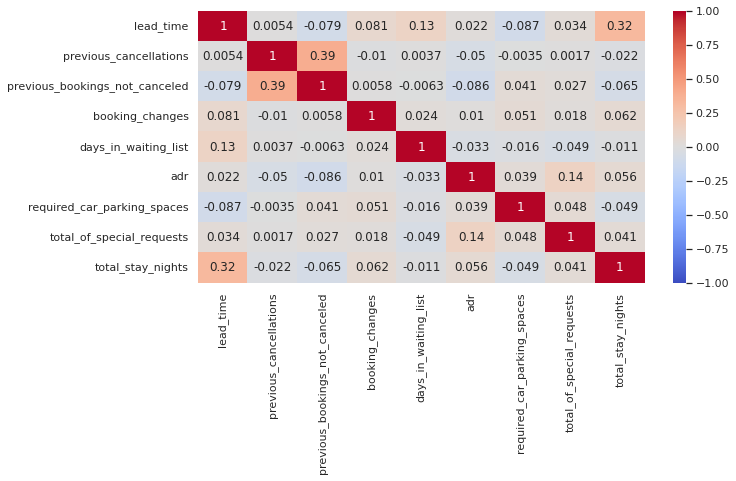

In [84]:
# Correlation Heatmap visualization code
corr_df_data = copy_df[['lead_time', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list','adr',
          'required_car_parking_spaces','total_of_special_requests','total_stay_nights']]
corr_df=corr_df_data.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr_df, vmin=-1,annot=True,cmap='coolwarm')

##### 1. Why did you pick the specific chart?

We have used heatmap here, because it is considered one of the best chart to visualize correlation between different variables in a dataframe

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***